In [26]:
#The Imports
#from pandas_datareader import data, wb
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
import quandl
%matplotlib inline

In [32]:
#Setting Start and end dates
#start = datetime.datetime(2006, 1, 1)
#end = datetime.datetime(2016, 1, 1)
df = pd.read_pickle('all_banks') 

df.head()

ValueError: unsupported pickle protocol: 4

In [30]:
#Data Section

#Need to get stock information for the following banks
#Bank of America
#CitiGroup
#Goldman Sachs
#JPMorgan Chase
#Morgan Stanley
#Wells Fargo

#Bank of america
#BAC = data.DataReader("BAC", 'yahoo', start, end )
BAC = web.DataReader('WIKI/BAC', 'quandl',"2006-01-01", "2016-01-01")

RemoteDataError: Unable to read URL: https://www.quandl.com/api/v3/datasets/WIKI/BAC.csv?start_date=2006-01-01&end_date=2016-01-01&order=asc

In [8]:
#C = data.DataReader("C", 'google', start, end )
C = web.DataReader('C', 'yahoo',start, end)

In [9]:
#GS = data.DataReader( "GS", 'yahoo', start, end )
GS = web.DataReader('GS', 'yahoo',start, end)

In [10]:
#JPM = data.DataReader( "JPM", 'yahoo', start, end )
JPM = web.DataReader('JPM', 'yahoo',start, end)

In [11]:
#MS = data.DataReader( "MS", 'yahoo', start, end )
MS = web.DataReader('MS', 'yahoo',start, end)

In [12]:
#WFC = data.DataReader( "WFC", 'yahoo', start, end )
WFC = web.DataReader('WFC', 'yahoo',start, end)

In [13]:
#Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers
tickers = [ 'BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [14]:
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [15]:
#Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks.
#Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC ], axis=1,keys=tickers )

In [16]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  37.157749  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  36.763119  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  36.810474  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  36.755238  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  36.778908  15619400   

Bank Ticker           C                                        ...     \
Stock Info         Open        High         Low       Close    ...      
Date                                                           ...      
2006-01-03   490.000000  493.799988  481.100006  492.899994    ...      
2006-01-04   488.600006  491.000000  483.500000  483.799988    ...      
2006-01-05   484.399994  487.799988  484.000000  486.200012    ...      
2006-01-06   488.799988  489.000000  482.000000  486.200012    ...      
2006-01-09   486.000000  487.399994  483.000000  483.899994    ...      

Bank Ticker         MS                                       WFC             \
Stock Info         Low      Close  Adj Close   Volume       Open       High   
Date                                                                          
2006-01-03   56.740002  58.310001  40.259113  5377000  31.600000  31.975000   
2006-01-04   58.349998  58.349998  40.286736  7977800  31.799999  31.820000   
2006-01-05   58.020000  58.509998  40.397205  5778000  31.500000  31.555000   
2006-01-06   58.049999  58.570000  40.438644  6889800  31.580000  31.775000   
2006-01-09   58.619999  59.189999  40.866695  4144500  31.674999  31.825001   

Bank Ticker                                             
Stock Info         Low      Close  Adj Close    Volume  
Date                                                    
2006-01-03   31.195000  31.900000  23.238424  11016400  
2006-01-04   31.365000  31.530001  22.968884  10870000  
2006-01-05   31.309999  31.495001  22.943392  10158000  
2006-01-06   31.385000  31.680000  23.078157   8403800  
2006-01-09   31.555000  31.674999  23.074520   5619600  

[5 rows x 36 columns]

In [17]:
#bank_stocks[bank_stocks["Close"]]
#for i in tickers:
#bank_stocks.xs("BAC", axis=1, )['Close'].max()

bank_stocks.xs(key='Close', axis=1, level="Stock Info").max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [18]:
#** Create a new empty DataFrame called returns. 
#This dataframe will contain the returns for each bank's stock. returns are typically defined by:
#$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [19]:
returns = pd.DataFrame()

In [20]:
#We can use pandas pct_change() method on the Close column to create a column representing this return value.
#Create a for loop that goes and for each Bank Stock Ticker
#creates this returns column and set's it as a column in the returns DataFrame.

In [21]:
for i in tickers:
    returns[i + ' Return'] = bank_stocks[i]['Close'].pct_change()

In [22]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


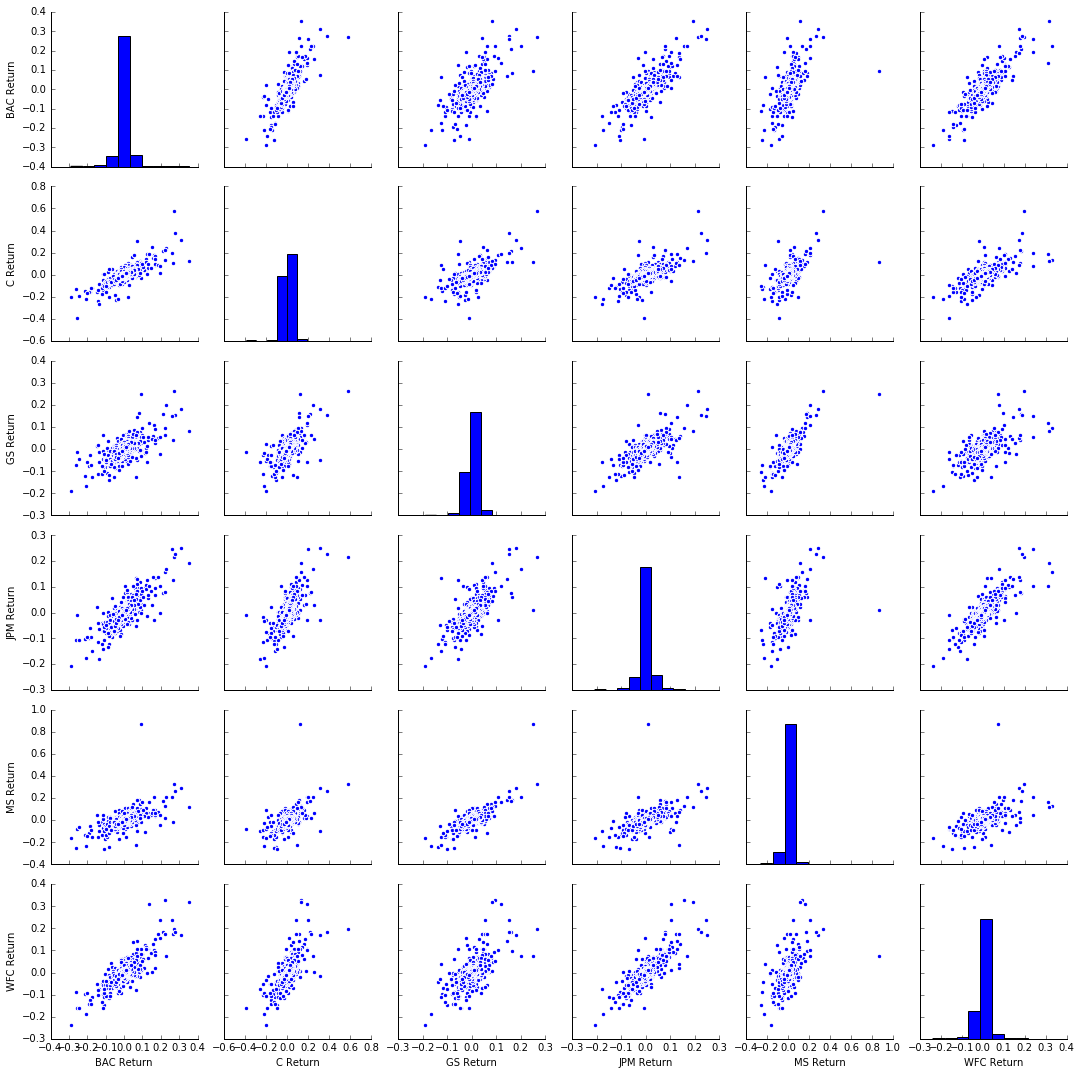

In [23]:
#Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?
import seaborn as sns
sns.pairplot( returns[1:] )

In [24]:
#Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns.
#You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?

In [25]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]